In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import re
import nltk
import math
import os
import matplotlib.pyplot as plt
import sklearn.metrics

from collections import Counter


from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

%matplotlib inline


In [2]:
def peptide_counter(sequences,peptide_size):
    ''' This function returns the count of peptide of user defined size in a sequence'''
    # instantiate a CountVectorizer()
    vector = CountVectorizer(min_df=1,token_pattern=r'\w{1}',ngram_range=(peptide_size,peptide_size))
    
    # transform the protein sequences 
    X = vector.fit_transform(sequences)
    
    vocab = list(vector.get_feature_names())
    vocab = [str(aa) for aa in vocab]
    counts = X.sum(axis=0).A1
    
    return Counter(dict(zip(vocab, counts)))
    

## Load csv files

In [3]:
proteins = pd.read_csv('protein-SevenLocations-Feb12.csv')

proteins.head()

,name,sequence,location,label
0,tr|A0A0N4VT99|A0A0N4VT99_HAEPC,LLFVWLPQFIVRPHALLRFWMETDCQGNPPMYGDFEAQRHWMEITI...,0,ER
1,tr|A0A3P8RTP6|A0A3P8RTP6_AMPPE,MGRCVFLILAVLFSVTSSQFIPPYTEDCRTEMYPPKGPTYRGAVGW...,3,lysosome
2,sp|O89290|POL_HV193,MGARASVLSGGKLDAWEKIRLRPGGKKKYRLKHLVWASRELERFAL...,6,plasma_membrane
3,tr|S2JAV3|S2JAV3_MUCC1,MVKKQKKKQPITARVQPTEAKFKHSRVETARLIRKFHVLNKELAKC...,5,nucleus
4,sp|A5I7A5|UVRC_CLOBH,MFDLEYQLKNLPDKPGVYLMKNNLGEIIYVGKAKILKNRVRQYFQK...,2,cytoplasm


In [4]:
proteins.shape

(700483, 4)

In [5]:
# permute/scramble/shuffle rows of the dataframe
proteins = proteins.sample(frac=1)

In [6]:
proteins.location.value_counts()

5    178929
0    118331
4    109750
2     97116
1     75188
3     60911
6     60258
Name: location, dtype: int64

In [7]:
proteins.label.value_counts()

nucleus            178929
ER                 118331
mitochondria       109750
cytoplasm           97116
Golgi               75188
lysosome            60911
plasma_membrane     60258
Name: label, dtype: int64

In [8]:
# remove the duplicate protein sequences
proteins = proteins.drop_duplicates(subset='sequence', keep="first")

# remove nan from 'sequence' column
proteins = proteins[proteins['sequence'].notnull()]

proteins.shape

(700483, 4)

In [9]:
proteins.label.value_counts()

nucleus            178929
ER                 118331
mitochondria       109750
cytoplasm           97116
Golgi               75188
lysosome            60911
plasma_membrane     60258
Name: label, dtype: int64

## Counter of Hexapeptides for all 7 Cellular Location Classes

In [10]:
# Peptide count is used for analysis
sequences_all = proteins.sequence

peptide_size = 6

peptide_all_counter = peptide_counter(sequences_all,peptide_size)

peptide_all_counter.most_common(10)

[('g g g g g g', 45628),
 ('e e c s c y', 31637),
 ('l r t q e s', 31307),
 ('i l r t q e', 31145),
 ('s s s s s s', 30140),
 ('r t q e s e', 29726),
 ('t q e s e c', 29709),
 ('e e e e e e', 28938),
 ('m n p n q k', 28879),
 ('n p n q k i', 28249)]

In [11]:
peptide_Top = peptide_all_counter.most_common(10)
#print(type(DNA_Top))

for item in peptide_Top:
    print(item)

('g g g g g g', 45628)
('e e c s c y', 31637)
('l r t q e s', 31307)
('i l r t q e', 31145)
('s s s s s s', 30140)
('r t q e s e', 29726)
('t q e s e c', 29709)
('e e e e e e', 28938)
('m n p n q k', 28879)
('n p n q k i', 28249)


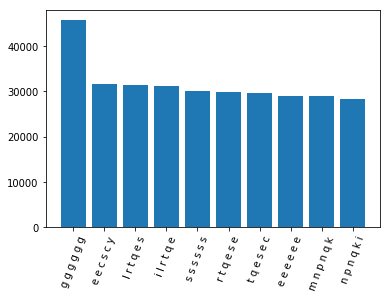

In [12]:
plt.bar(range(len(peptide_Top)), [tup[1] for tup in peptide_Top], align='center')
plt.xticks(range(len(peptide_Top)), [tup[0] for tup in peptide_Top])
plt.xticks(rotation=70)
plt.show()

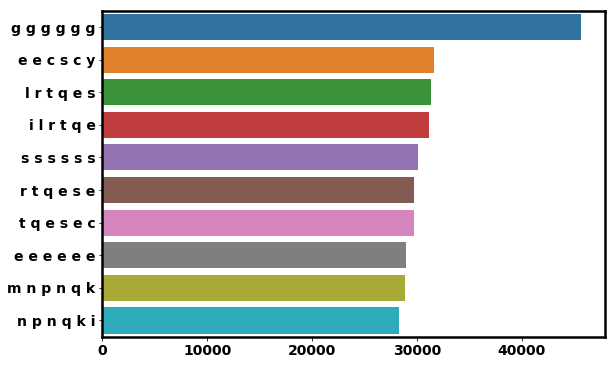

In [13]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.barplot(x = [tup[1] for tup in peptide_Top],y= [tup[0] for tup in peptide_Top])
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.savefig('hexapeptides_Locations_ALL-2.png')